Task: Cluster the credit card users into diﬀerent groups to find any meaningful patterns. Use
Principal Component Analysis (PCA) to reduce the dimension of the feature space and then
use the K-means algorithm to find clusters. 

Import relevant Python libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Load dataset 
(CC GENERAL.csv, the name of the file when downloaded from Kaggle.)

Dataset Description

CUSTID: Identification Credit Card Holder (Categorical)

BALANCEFREQUENCY: The frequency of balance getting updated; a score between 0 and 1

ONEOFFPURCHASES: The maximum purchase amount in one-go

CASHADVANCEFREQUENCY: The frequency of cash in advance being paid

INSTALLMENTSPURCHASES: Amount of purchase done in installment

BALANCE: Balance amount left in their account

PURCHASES: Number of purchases made from the account

PURCHASESINSTALLMENTSFREQUENCY: The frequency of purchases in installments

CHASEADVANCETRX: The number of transactions made with Cash in Advance

CASHADVANCE: Cash in advance given by the user

In [2]:
df = pd.read_csv('CC GENERAL.csv')

## Inspect Data

In [3]:
def inspect(sample):
    print(sample.sample(5))
    sample.info() 
    print(df.shape)
    print(sample.describe().transpose())
inspect(df)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3273  C13367  5905.955278                1.0    1642.94           1642.94   
6102  C16273   857.712196                1.0    1224.00            564.00   
3261  C13355  3688.371995                1.0       0.00              0.00   
4633  C14759   244.653051                1.0    1181.03            607.40   
4306  C14425   132.734460                0.1    2190.00           2190.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3273                    0.00   2154.941692             0.333333   
6102                  660.00   2645.818049             0.666667   
3261                    0.00  10746.545380             0.000000   
4633                  573.63      0.000000             0.666667   
4306                    0.00      0.000000             0.100000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3273                    0.333333                          0.0000

In [4]:
df.drop('CUST_ID',axis=1,inplace=True) # Drop arbitrary numerical Customer ID column

## Check for null values and handle those values.

In [5]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Minimum payments that are missing values are likely due to no minimum payments being required so values will be filled with 0 and Credit limit will be filled with mean

In [6]:
df.fillna({'MINIMUM_PAYMENTS': 0}, inplace=True) #filled minimum payments with mean value
df.fillna({'CREDIT_LIMIT': df['CREDIT_LIMIT'].mean()}, inplace=True) #filled credit limit with mean value   

In [7]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Perform feature scaling using StandardScaler.

In [8]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [9]:
pca = PCA()
pca.fit(scaled_df)

PCA()

## Perform PCA with all the columns and plot number of components vs. PCA cumulative explained variance. 

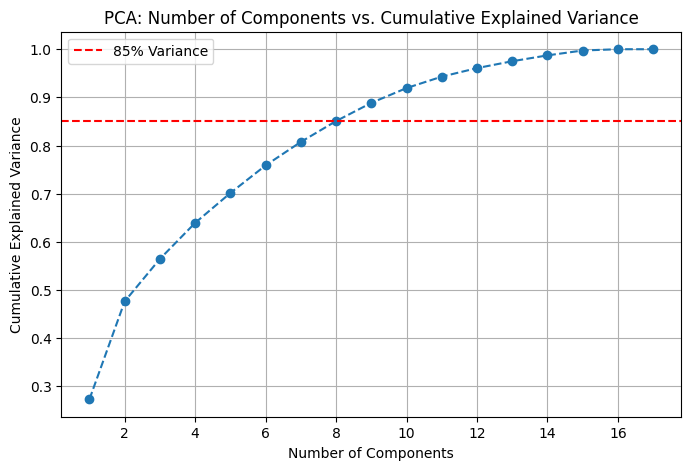

In [10]:
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Number of Components vs. Cumulative Explained Variance')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Variance')
plt.legend()
plt.grid()
plt.show()

### From the plot, identify the number of components required to cover 85% of the variance.

In [11]:
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_), columns=['Cumulative Explained Variance'], index=range(1, 18))

,Cumulative Explained Variance
1,0.273016
2,0.476213
3,0.564468
4,0.639257
5,0.701301
6,0.758630
7,0.807451
8,0.850695
9,0.888491
10,0.919291


#### As seen on the plot and examining the dataframe of Cumulative Explained Variance, by the 8th principal component 85% of the variance is covered.

## Perform PCA with 2 principal components with the aim of visualizing clustering.

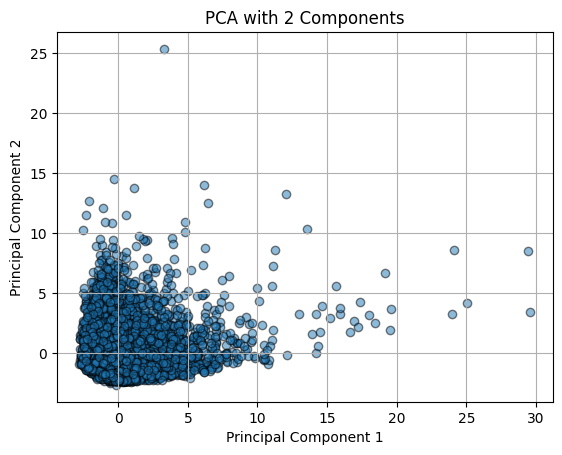

In [12]:
pca_2 = PCA(n_components=2)
pca_data_2 = pca_2.fit_transform(scaled_df)
pca_df_2 = pd.DataFrame(data=pca_data_2, columns=['PC1', 'PC2'])
plt.scatter(data=pca_df_2, x='PC1', y='PC2',alpha=0.5, edgecolors='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with 2 Components')
plt.grid()
plt.show()

### Find the 2 columns which give the most covariances.
### Interpret the results of PCA by looking at the covariance matrix (use get_covariance() method of PCA).

In [13]:
n_components = 2
for i in np.arange(n_components):
    index = np.argmax(np.absolute(pca_2.get_covariance()[i]))
    max_cov = pca_2.get_covariance()[i][index]
    column_name = df.columns[index]
    print(f'Principal Component {i + 1}: {column_name} ({max_cov})')


Principal Component 1: BALANCE (1.1022248891735433)
Principal Component 2: BALANCE_FREQUENCY (0.7023971737406682)


Interpretation:

Principal component #1 has highest covariance with BALANCE column, meaning that the customer's account balance has a high influence on the variance explained by principal component #1.

Principal component #2 has high covariance with BALANCE_FREQUENCY column, meaning that the frequency in which the customer's balance is updated influences the variance explained by principal component #2.

## Perform K Means Clustering on the 2 component PCA transformed data with clusters ranging from 2 to 11

### Plot the K Means inertia against the number of clusters (Elbow Method). 

From the elbow plot, identify the ideal required number of clusters.

In [14]:
n_clusters = np.arange(2, 12)
inertia = []
for i in n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data_2)
    inertia.append(kmeans.inertia_)
    

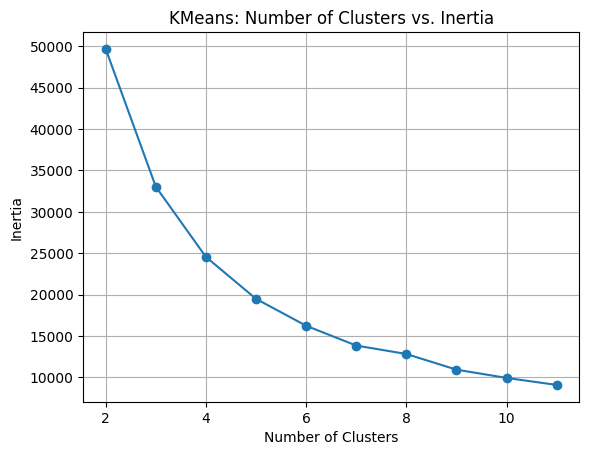

In [15]:
plt.plot(n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('KMeans: Number of Clusters vs. Inertia')
plt.grid()
plt.show()

Ideal number of clusters (k) appears to be 4, using elbow method. The "elbow" point shows us where the addition of more clusters yield diminishing return. 

## Perform K Means Clustering on the 2 component PCA transformed data with the ideal number of clusters

In [16]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster']= kmeans_4.fit_predict(pca_data_2)
df['Cluster'] = df['Cluster'].apply(lambda x: x+1) # Change cluster labels to start from 1

• Visualize the clusters on a scatter plot between 1st PCA and 2nd PCA component giving
diﬀerent colors to each cluster.

Text(0.5, 1.0, 'K Means Clustering on 2 PCA Components')

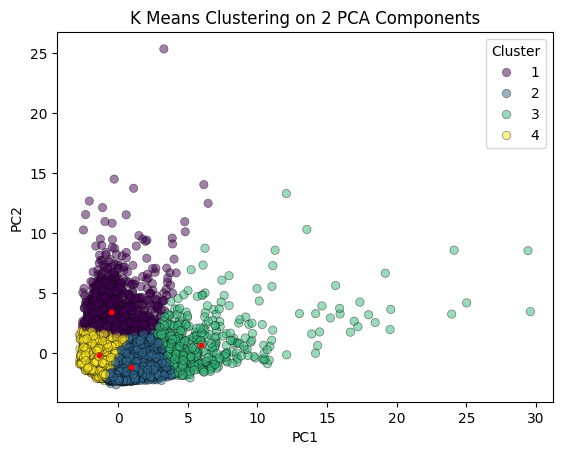

In [17]:
sns.scatterplot(data=pca_df_2, x='PC1', y='PC2', hue=df['Cluster'], palette='viridis', alpha=0.5, edgecolor='black')
plt.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], s=10, c='red', label='Centroids')
plt.title('K Means Clustering on 2 PCA Components')

#### Observations
- Cluster 3 is likely more influenced by customer's balance amount
- Cluster 1 is likely more influenced by customer's updated balance frequency
- Clusters 2 & 4 are less affected compared to clusters 3 and 1